<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Tabular_data_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14th Jan, 2022
# github deeplearning repo
# Ref: https://docs.fast.ai/tutorial.tabular.html
#      https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai
#      https://www.martinalarcon.org/2018-12-31-b-water-pumps/
# Objectives:
#           a) Using fastai to preprocess data
#           b) fastai for developing model
#           c) fast ai for making data ready for other libraries

# Tabular models
To get help on fastai functons use `doc()`.<br>
Reference See [here](https://docs.fast.ai/tutorial.tabular.html)<br>
What are DataLoaders? See [here](https://dirk-kalmbach.medium.com/datablock-and-dataloaders-in-fastai-d5aa7ae560e5) and [here](https://muttoni.github.io/blog/machine-learning/fastai/2020/12/26/datablocks-vs-dataloaders.html)

In [1]:
# 0.0
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# To see prettier help using doc()
!pip install nbdev

## Call libraries

In [4]:
# 1.0 Call libraries:

from fastai.tabular import *

# For FillMissing, Categorify, Normalize, untar_data
from fastai.tabular.all import *

## Get data

Pathlib module contains useful functions to perform file-related tasks. Pathlib provides a more readable and easier way to build up paths by representing filesystem paths as proper objects and enables us to write code that is portable across platforms.

In [5]:
# 1.1 untar_data will download data (if not already downloaded)
#      to /root/.fastai/data/adult_sample

path = untar_data(URLs.ADULT_SAMPLE)
path
print("=====\n")
path.ls()
print("=====\n")
type(path)

Path('/root/.fastai/data/adult_sample')

=====



(#3) [Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/export.pkl'),Path('/root/.fastai/data/adult_sample/adult.csv')]

=====



pathlib.PosixPath

### About pathlib
See [here](https://stackabuse.com/introduction-to-the-python-pathlib-module/)


    Path.cwd(): Return path object representing the current working directory
    Path.home(): Return path object representing the home directory
    Path.stat(): return info about the path
    Path.chmod(): change file mode and permissions
    Path.glob(pattern): Glob the pattern given in the directory that is represented by the path, yielding matching files of any kind
    Path.mkdir(): to create a new directory at the given path
    Path.open(): To open the file created by the path
    Path.rename(): Rename a file or directory to the given target
    Path.rmdir(): Remove the empty directory
    Path.unlink(): Remove the file or symbolic link


In [6]:
# 2.0
from pathlib import *


In [7]:
# 2.1
Path.cwd()
Path.home()

Path('/content')

Path('/root')

In [8]:
# 2.2 How to buid paths
outpath = Path.cwd() / 'output' / 'output.xlsx'
outpath

Path('/content/output/output.xlsx')

In [9]:
# 2.3
path.is_dir()
path.stat()

True

os.stat_result(st_mode=16893, st_ino=6029508, st_dev=45, st_nlink=3, st_uid=1000, st_gid=1000, st_size=4096, st_atime=1673680234, st_mtime=1543965152, st_ctime=1673680234)

In [10]:
# 2.4
path.glob("*.csv")

<generator object Path.glob at 0x7f62979e5190>

In [11]:
# 2.5
for i in path.glob("*.csv"):
  print(i)

/root/.fastai/data/adult_sample/adult.csv


## Read our data

In [12]:
# 3.0 Read the downloaded dataset 
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [13]:
# 3.1
df.shape   # (32561, 15)

(32561, 15)

## Data types & Data processing

In [14]:
# 3.2 Define some constants:

dep_var = 'salary'    # target
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']


Processes to operate on data. Refer below for API:<br>
[FillMissing](https://docs.fast.ai/tabular.core.html#fillmissing) will fill the missing values in the continuous variables by the median of existing values (you can choose a specific value if you prefer)<br>
[Categorify](https://docs.fast.ai/tabular.core.html#categorify): Transform the categorical variables to something similar to pd.Categorical<br>
[Normalize](https://docs.fast.ai/data.transforms.html#normalize) will normalize the continuous variables (subtract the mean and divide by the std)<br>


In [15]:
# 3.3 What all we need to do over this data
#  and in what sequence:

procs = [FillMissing, Categorify, Normalize]

About TabularDataLoaders see [here](https://docs.fast.ai/tabular.data.html#tabulardataloaders.from_csv)<br>
The following code does not give satisfactory results

In [16]:
# Defaults to 80:20
#dls = TabularDataLoaders.from_csv(
#                                  path / 'adult.csv',
#                                  path=path,
#                                  y_names="salary",
#                                  bs = 64,   # Try 2 or 3
#                                  cat_names = cat_names,
#                                  cont_names = cont_names,
#                                  procs = procs)

Instead proceed as follows:<br>
First split the dataset

In [17]:
# 4.0 Get two splits of data
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [18]:
# 4.1 This is what splits object is:
splits

((#26049) [27068,2037,12359,8125,24249,28676,6055,19020,14970,11767...],
 (#6512) [10912,12594,17631,3823,18367,28110,14973,23337,30988,30579...])

Transform pandas to a fastai data structure known as Tabular Pandas

In [19]:
# 5.0
to = TabularPandas(
                   df,
                   procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   splits=splits
                   )

In [20]:
# 5.1 See now completely preprocessed data:

to.xs.iloc[:2]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
27068,8,16,5,15,4,3,1,0.029350,1.300734,-0.030878
2037,5,12,3,2,1,5,1,-1.362189,0.358500,-0.420960


In [21]:
# 5.2 Build our DataLoaders now:

dls = to.dataloaders(bs=64)

### A bit about `dls` object
Can be skipped

In [22]:
# 5.2.1
x = dls.train_ds
x   #  26049 rows x 16 columns

            age  workclass    fnlwgt  education  education-num  \
27068  0.029350          8  1.300734         16      -0.030878   
2037  -1.362189          5  0.358500         12      -0.420960   
12359 -0.995995          5  0.091077         16      -0.030878   
8125  -1.581906          1 -1.345435          2      -1.201123   
24249  0.249067          5 -0.596800         10       1.139366   
...         ...        ...       ...        ...            ...   
32076  0.761739          3  0.037889         13       1.529448   
9110  -0.849517          5 -1.313770         10       1.139366   
22640 -0.849517          3  1.259232         16      -0.030878   
5635  -0.263606          5  0.241211          2      -1.201123   
13292  2.812429          5 -0.022146         16      -0.030878   

       marital-status  occupation  relationship  race      sex  capital-gain  \
27068               5          15             4     3     Male             0   
2037                3           2             1

In [23]:
# 5.2.2
type(x)

fastai.tabular.core.TabularPandas

In [24]:
# 5.2.3 Show validation batch
dls.valid.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Self-emp-inc,7th-8th,Divorced,Craft-repair,Unmarried,White,False,42.0,369781.000875,4.0,<50k
1,Private,HS-grad,Never-married,Other-service,Not-in-family,White,False,33.0,184832.999807,9.0,<50k
2,State-gov,Masters,Divorced,Protective-serv,Not-in-family,White,False,48.0,49595.003624,14.0,<50k
3,Private,HS-grad,Widowed,Transport-moving,Unmarried,White,False,57.0,34269.005325,9.0,>=50k
4,Private,HS-grad,Divorced,Other-service,Not-in-family,White,False,30.0,46711.998521,9.0,<50k
5,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,36.0,175642.999743,9.0,<50k
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,57.0,165922.000106,9.0,<50k
7,Private,HS-grad,Never-married,Exec-managerial,Own-child,White,False,27.0,301654.006173,9.0,<50k
8,Private,Some-college,Divorced,Adm-clerical,Unmarried,Black,False,46.0,200734.000387,10.0,<50k
9,Local-gov,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,58.0,217774.999614,9.0,>=50k


In [25]:
# 5.2.4 Show a batch (bs = 3)
#  Batch has three observations
#   List contains label encoded cat values
#    And tensor floats are numerical values
#     Displayed batch is picked up randomy
dls.one_batch()

(tensor([[ 3,  3,  7,  2,  2,  5,  1],
         [ 5, 10,  3,  5,  1,  2,  1],
         [ 5,  8,  5, 13,  2,  3,  1],
         [ 8,  7,  3, 15,  1,  5,  1],
         [ 5,  2,  3, 15,  1,  5,  1],
         [ 5, 16,  5,  2,  4,  3,  1],
         [ 5, 13,  3, 11,  1,  2,  1],
         [ 3, 12,  3,  5,  1,  5,  1],
         [ 3, 10,  1, 11,  5,  3,  1],
         [ 5, 13,  3, 11,  1,  5,  1],
         [ 6, 16,  3,  5,  1,  5,  1],
         [ 5, 12,  3,  5,  1,  5,  1],
         [ 5, 12,  4,  9,  2,  5,  1],
         [ 5,  2,  5,  8,  2,  5,  1],
         [ 5,  9,  3, 15,  1,  5,  1],
         [ 5, 12,  1,  5,  5,  5,  1],
         [ 5, 10,  5, 11,  2,  3,  1],
         [ 5, 12,  1,  9,  5,  5,  1],
         [ 6, 16,  3,  5,  1,  2,  1],
         [ 5, 10,  3,  5,  1,  5,  1],
         [ 5, 12,  1,  2,  4,  5,  1],
         [ 5, 16,  3,  4,  1,  5,  1],
         [ 5, 12,  6,  8,  4,  5,  1],
         [ 2, 10,  3, 11,  1,  5,  1],
         [ 5, 12,  7,  5,  5,  5,  1],
         [ 5, 16,  6,  5,

In [26]:
# 5.2.5 Same batch as above but actual values are shown:
##       Displayed batch is picked up randomly
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Masters,Married-civ-spouse,Transport-moving,Husband,White,False,39.000000,225544.001447,14.0,<50k
1,Private,Assoc-voc,Widowed,Prof-specialty,Not-in-family,White,False,72.999999,183212.999712,11.0,>=50k
2,Private,11th,Divorced,Machine-op-inspct,Unmarried,White,False,35.000000,194808.999847,7.0,<50k
3,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,48.000000,121123.998174,9.0,>=50k
4,Local-gov,Masters,Never-married,Prof-specialty,Not-in-family,White,False,45.000000,167334.000095,14.0,>=50k
5,Private,Some-college,Never-married,Machine-op-inspct,Not-in-family,White,False,27.000000,146460.000739,10.0,<50k
6,Private,Some-college,Married-civ-spouse,Sales,Husband,White,False,53.000000,121441.001681,10.0,<50k
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,42.000000,238188.000114,9.0,<50k
8,Private,Some-college,Divorced,Craft-repair,Not-in-family,White,False,42.000000,193994.999820,10.0,<50k
9,Private,HS-grad,Married-civ-spouse,#na#,Husband,White,False,31.000000,49923.003896,9.0,<50k


## LEarn now

In [27]:
# 6.0
learn = tabular_learner(dls, metrics=accuracy)

In [28]:
# To get help on tabular_learner
doc(tabular_learner)

In [32]:
doc(learn.lr_find)

SuggestedLRs(valley=0.002511886414140463)

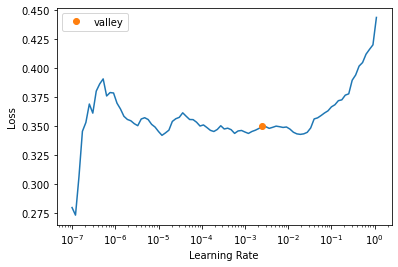

In [ ]:
# 6.1 select the appropriate learning rate
#       we typically find the point where the slope is steepest
learn.lr_find()

### Our model

In [ ]:
# 6.2 Embeddings
learn.embeds

In [ ]:
# 6.3 Drop outs in embedding layers
learn.emb_drop

Dropout(p=0.0, inplace=False)

In [ ]:
# 6.4 Batch Normalization
learn.bn_cont

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
# 6.5 Model layers:
learn.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=42, out_features=200, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): LinBnDrop(
    (0): Linear(in_features=200, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): LinBnDrop(
    (0): Linear(in_features=100, out_features=2, bias=True)
  )
)

And we can train that model with the `fit_one_cycle` method (the `fine_tune` method won’t be useful here since we don’t have a pretrained model).

In [ ]:
# 6.2 Less the batch_size (bs), more the time:
#     On slice(), see this discussion:
#      https://forums.fast.ai/t/what-does-the-slice-lr-mean-in-fit-one-cycle/60896/6
learn.fit_one_cycle(10, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.357202,0.369609,0.830927,00:05
1,0.365751,0.362052,0.828317,00:04
2,0.345085,0.362962,0.828624,00:04
3,0.350397,0.361008,0.833385,00:04
4,0.342867,0.363868,0.831849,00:04
5,0.348970,0.356818,0.834306,00:04
6,0.345280,0.356516,0.832924,00:05
7,0.341203,0.353796,0.834613,00:05
8,0.335134,0.354227,0.834613,00:05
9,0.329142,0.354331,0.834613,00:04


## Make predictions

### Directly from a DataFrame

In [ ]:
# 7.0 We can then have a look at some predictions:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,9.0,5.0,2.0,2.0,5.0,1.0,-0.993250,-1.034500,0.360500,0.0,0.0
1,5.0,12.0,5.0,7.0,2.0,5.0,1.0,-1.066548,-0.071559,-0.424213,0.0,0.0
2,7.0,10.0,3.0,5.0,1.0,5.0,1.0,0.839200,-1.434654,1.145213,1.0,1.0
3,6.0,10.0,3.0,11.0,1.0,5.0,1.0,0.106220,-0.856380,1.145213,0.0,1.0
4,5.0,16.0,3.0,8.0,1.0,5.0,1.0,0.326114,-0.038621,-0.031857,1.0,0.0
5,2.0,10.0,3.0,11.0,1.0,5.0,1.0,0.765902,-0.575086,1.145213,1.0,1.0
6,5.0,12.0,5.0,9.0,4.0,2.0,1.0,-1.433037,-0.881881,-0.424213,0.0,0.0
7,5.0,12.0,3.0,8.0,1.0,3.0,1.0,0.546008,2.963465,-0.424213,1.0,0.0
8,5.0,8.0,5.0,2.0,2.0,5.0,1.0,0.546008,0.392527,0.752856,0.0,0.0


In [ ]:
# 7.1 Make prediction for one row:
row, clas, probs = learn.predict(df.iloc[0])

In [ ]:
# 7.2 Show result of one row
row.show()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,False,49.0,101319.999696,12.0,>=50k


In [ ]:
# 7.3 Other information
clas, probs

(tensor(1), tensor([0.4005, 0.5995]))

### From Data Loader object

To get prediction on a new dataframe, you can use the test_dl method of the DataLoaders. That dataframe does not need to have the dependent variable in its column. About `test_dl` object , see [here](https://muellerzr.github.io/fastblog/2020/08/10/testdl.html)

In [ ]:
# 8.0
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)

In [ ]:
# 8.1 Transform test_df exactly in the manner
#      train was done using test_dl
dl = learn.dls.test_dl(test_df)

In [ ]:
# 8.2 Get predictions now:

learn.get_preds(dl=dl)

(tensor([[0.4005, 0.5995],
         [0.3844, 0.6156],
         [0.9888, 0.0112],
         ...,
         [0.5176, 0.4824],
         [0.6915, 0.3085],
         [0.6965, 0.3035]]), None)

### Get prediction from any arbitrary data

In [ ]:
# 9.0
test_data = {
    'age': [49], 
    'workclass': ['Private'], 
    'fnlwgt': [101320],
    'education': ['Assoc-acdm'], 
    'education-num': [12.0],
    'marital-status': ['Married-civ-spouse'], 
    'occupation': [''],
    'relationship': ['Wife'],
    'race': ['White'],
}

# 9.1
input = pd.DataFrame(test_data)

In [ ]:
# 9.2
tdl = learn.dls.test_dl(input)

In [ ]:
# 9.3
learn.get_preds(dl=tdl)

(tensor([[0.7156, 0.2844]]), None)

## USing fastai pre-processing with sklearn and other libraries

As mentioned earlier, `TabularPandas` is a powerful and easy preprocessing tool for tabular data. Integration with libraries such as `Random Forests` and `XGBoost` requires only one extra step, that the .dataloaders call did for us. Let’s look at our `to` object again. Its values are stored in a DataFrame like object, where we can extract the `cats`, `conts`, `xs` and `ys` if we want to:

In [ ]:
# 10.0
to.xs[:3]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
19042,8,13,3,5,1,3,1,-0.773356,-1.052961,1.537569
20852,5,16,3,4,1,5,1,-0.113674,-1.496425,-0.031857
25104,7,16,1,9,2,5,1,0.619306,-0.297038,-0.031857


Now that everything is encoded, you can then send this off to `XGBoost` or `Random Forests` by extracting the train and validation sets and their values:

In [ ]:
# 10.1 Get split and pre-processed data:

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
# 10.2
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(26049, 10)

(6512, 10)

(26049,)

(6512,)

In [ ]:
###########################